## Imports

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Load data and plot

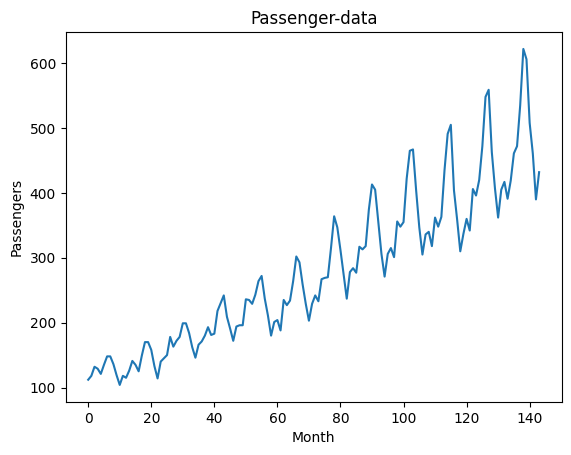

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

y = df["Passengers"].astype("float32").to_numpy()

plt.figure()
plt.plot(y)
plt.title("Passenger-data")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.show()

## Normalize

In [5]:
y_min, y_max = y.min(), y.max()
y = (y - y_min) / (y_max - y_min)   # now y is 0..1

## Make prediction windows

In [6]:
W = 20  # TODO: choose window size
X, Y = [], []
for i in range(len(y) - W):
    X.append(y[i:i+W])
    Y.append(y[i+W])

X = np.array(X, dtype="float32")            # (N, W)
Y = np.array(Y, dtype="float32")            # (N,)
X = X[..., None]                             # (N, W, 1) for Keras

## (Optional) Plot sample window

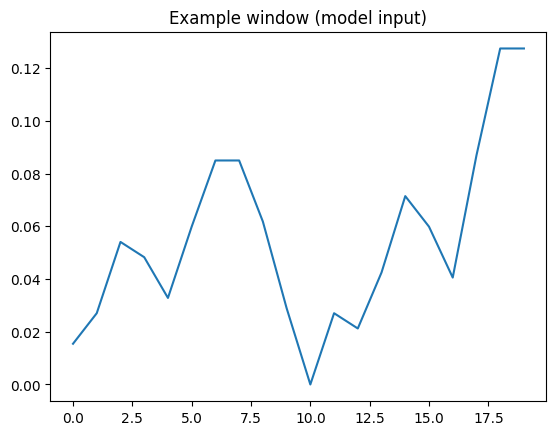

In [7]:
plt.figure()
plt.plot(X[0].squeeze())
plt.title("Example window (model input)")
plt.show()

## Train/val/test split

In [8]:
n = len(X)
n_train = int(n * 0.7)
n_val = int(n * 0.15)

X_train, Y_train = X[:n_train], Y[:n_train]
X_val,   Y_val   = X[n_train:n_train+n_val], Y[n_train:n_train+n_val]
X_test,  Y_test  = X[n_train+n_val:], Y[n_train+n_val:]

## Build model

In [9]:
model = keras.Sequential([
    layers.Input(shape=(W, 1)), # Input layer with same size as data
    layers.SimpleRNN(64), 
    layers.Dense(1) # Predicting one value
])

## Compile with optimizer

In [10]:
model.compile(
    optimizer="adam", 
    loss="mse", 
    metrics=["mae"]
    )

In [ ]:
model.summary()

## Train (yay)

In [11]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,                     
    batch_size=32,
    verbose=1
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.1594 - mae: 0.3117 - val_loss: 0.0163 - val_mae: 0.0969
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0299 - mae: 0.1547 - val_loss: 0.0093 - val_mae: 0.0749
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mae: 0.0826 - val_loss: 0.0672 - val_mae: 0.2439
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0203 - mae: 0.1166 - val_loss: 0.0437 - val_mae: 0.1899
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0092 - mae: 0.0707 - val_loss: 0.0084 - val_mae: 0.0663
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0116 - mae: 0.0927 - val_loss: 0.0080 - val_mae: 0.0673
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.0153 - val_mae: 0.0981
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0058 - mae: 0.0565 - val_loss: 0.0255 - val_mae: 0.1366
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0070 - mae: 0.0645 -

## Predict and "de-normalize"

In [ ]:
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print("Test MAE:", test_mae)

pred = model.predict(X_test, verbose=0).squeeze()

pred = pred * (y_max - y_min) + y_min
Y_test = Y_test * (y_max - y_min) + y_min

## Plot

In [ ]:
plt.plot(Y_test[:200], label="true")
plt.plot(pred[:200], label="pred")
plt.legend()
plt.title("Next-step prediction (first 200 test points)")
plt.show()

## Dersom du vil prøve med aksjedata, bytt data med dette

In [ ]:
#pip install yfinance
#import yfinance as yf

#data = yf.download("AAPL", period="5y")
#y = data["Close"].astype("float32").to_numpy()